In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load the accident data
df = pd.read_csv('US_Accidents_March23.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nColumn names:")
print(df.columns.tolist())
print("\nData types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())

Dataset Shape: (7728394, 46)

First few rows:
    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset 

In [6]:
# Convert Start_Time to datetime with error handling
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.day_name()
df['Month'] = df['Start_Time'].dt.month

# Remove rows with invalid dates if any
df = df.dropna(subset=['Start_Time'])

print("Data preprocessing complete!")
print(f"Total accidents: {len(df):,}")

Data preprocessing complete!
Total accidents: 6,985,228


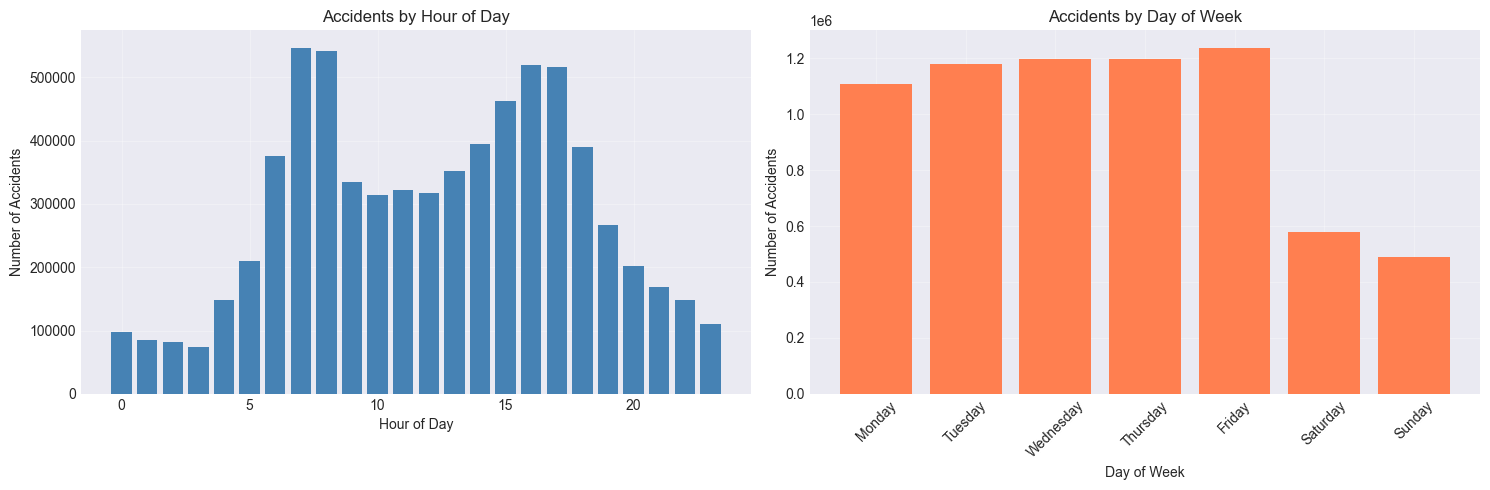


Peak accident hour: 7.0 with 546789 accidents
Peak accident day: Friday with 1237229 accidents


In [7]:
# ANALYSIS 1: Time of Day Patterns
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Accidents by Hour of Day
hourly_accidents = df['Hour'].value_counts().sort_index()
axes[0].bar(hourly_accidents.index, hourly_accidents.values, color='steelblue')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Number of Accidents')
axes[0].set_title('Accidents by Hour of Day')
axes[0].grid(True, alpha=0.3)

# Accidents by Day of Week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_accidents = df['DayOfWeek'].value_counts().reindex(day_order)
axes[1].bar(range(7), day_accidents.values, color='coral')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Number of Accidents')
axes[1].set_title('Accidents by Day of Week')
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(day_order, rotation=45)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nPeak accident hour:", hourly_accidents.idxmax(), "with", hourly_accidents.max(), "accidents")
print("Peak accident day:", day_accidents.idxmax(), "with", day_accidents.max(), "accidents")

Available weather columns: ['Weather_Condition', 'Temperature(F)', 'Visibility(mi)', 'Precipitation(in)']


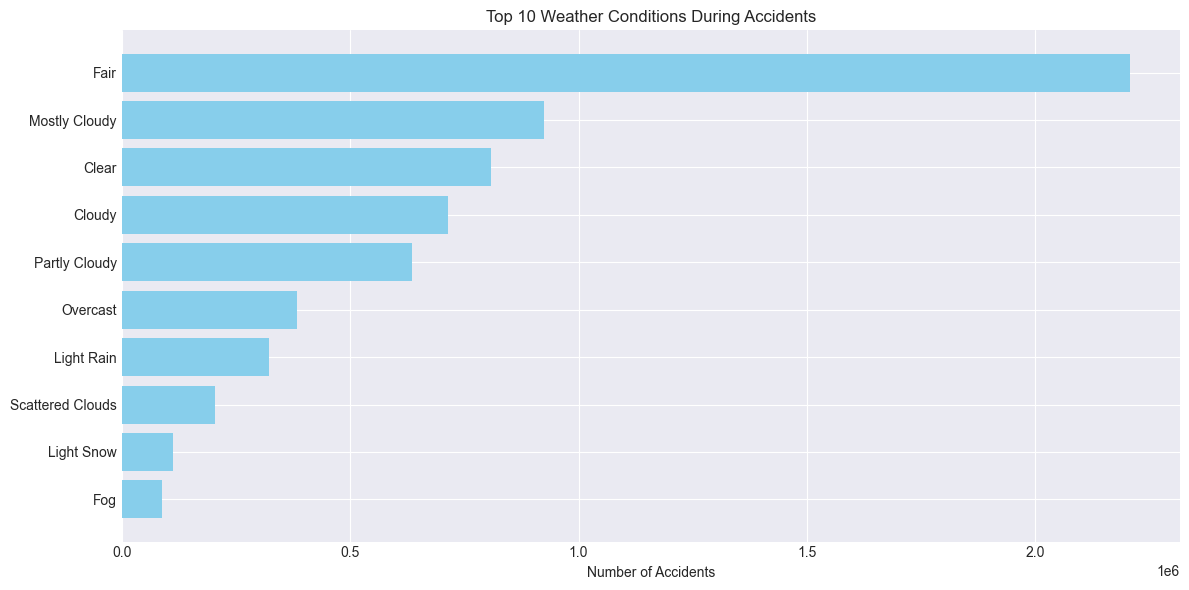


Most common weather condition: Fair
Accidents in this condition: 2,206,054


In [8]:
# ANALYSIS 2: Weather Conditions
weather_cols = ['Weather_Condition', 'Temperature(F)', 'Visibility(mi)', 'Precipitation(in)']

# Check which weather columns exist
available_weather_cols = [col for col in weather_cols if col in df.columns]
print(f"Available weather columns: {available_weather_cols}")

# Top 10 Weather Conditions
if 'Weather_Condition' in df.columns:
    top_weather = df['Weather_Condition'].value_counts().head(10)
    
    plt.figure(figsize=(12, 6))
    plt.barh(range(len(top_weather)), top_weather.values, color='skyblue')
    plt.yticks(range(len(top_weather)), top_weather.index)
    plt.xlabel('Number of Accidents')
    plt.title('Top 10 Weather Conditions During Accidents')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    print("\nMost common weather condition:", top_weather.index[0])
    print(f"Accidents in this condition: {top_weather.values[0]:,}")
else:
    print("Weather_Condition column not found in dataset")

Available road features: ['Junction', 'Traffic_Signal', 'Stop', 'Crossing', 'Bump', 'Roundabout']


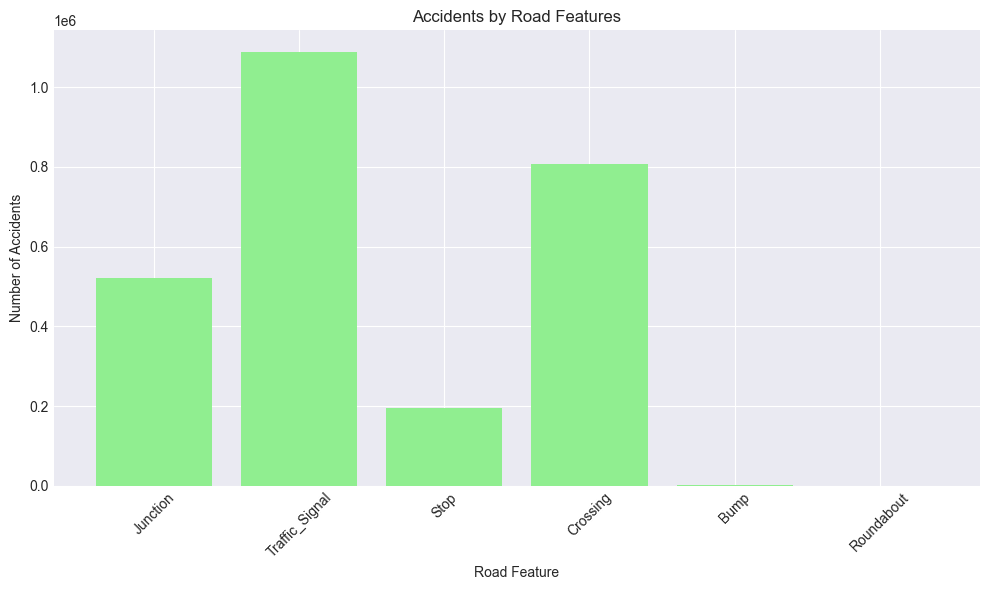


Road feature with most accidents: Traffic_Signal


In [9]:
# ANALYSIS 3: Road Conditions and Features
road_features = ['Junction', 'Traffic_Signal', 'Stop', 'Crossing', 'Bump', 'Roundabout']

# Check which road feature columns exist
available_features = [col for col in road_features if col in df.columns]
print(f"Available road features: {available_features}")

if available_features:
    # Count accidents with each road feature
    feature_counts = {}
    for feature in available_features:
        if df[feature].dtype == 'bool' or df[feature].dtype == 'object':
            feature_counts[feature] = df[feature].sum() if df[feature].dtype == 'bool' else (df[feature] == True).sum()
    
    if feature_counts:
        plt.figure(figsize=(10, 6))
        features = list(feature_counts.keys())
        counts = list(feature_counts.values())
        plt.bar(features, counts, color='lightgreen')
        plt.xlabel('Road Feature')
        plt.ylabel('Number of Accidents')
        plt.title('Accidents by Road Features')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        print("\nRoad feature with most accidents:", max(feature_counts, key=feature_counts.get))
else:
    print("No road feature columns found")

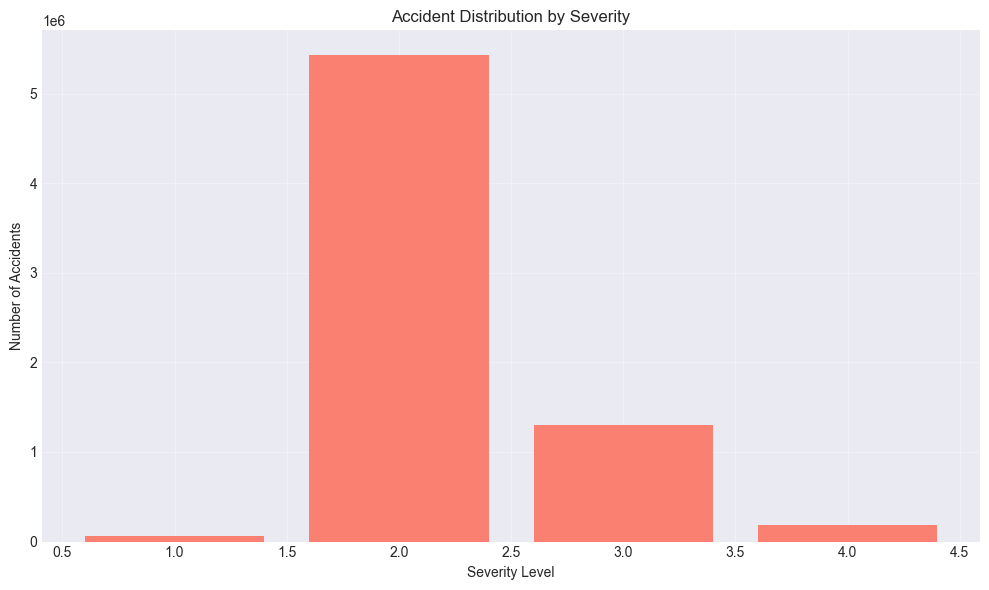


Severity distribution:
Level 1: 67,364 accidents (1.0%)
Level 2: 5,433,878 accidents (77.8%)
Level 3: 1,299,257 accidents (18.6%)
Level 4: 184,729 accidents (2.6%)


In [10]:
# ANALYSIS 4: Accident Severity
if 'Severity' in df.columns:
    severity_counts = df['Severity'].value_counts().sort_index()
    
    plt.figure(figsize=(10, 6))
    plt.bar(severity_counts.index, severity_counts.values, color='salmon')
    plt.xlabel('Severity Level')
    plt.ylabel('Number of Accidents')
    plt.title('Accident Distribution by Severity')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("\nSeverity distribution:")
    for level, count in severity_counts.items():
        print(f"Level {level}: {count:,} accidents ({count/len(df)*100:.1f}%)")
else:
    print("Severity column not found in dataset")

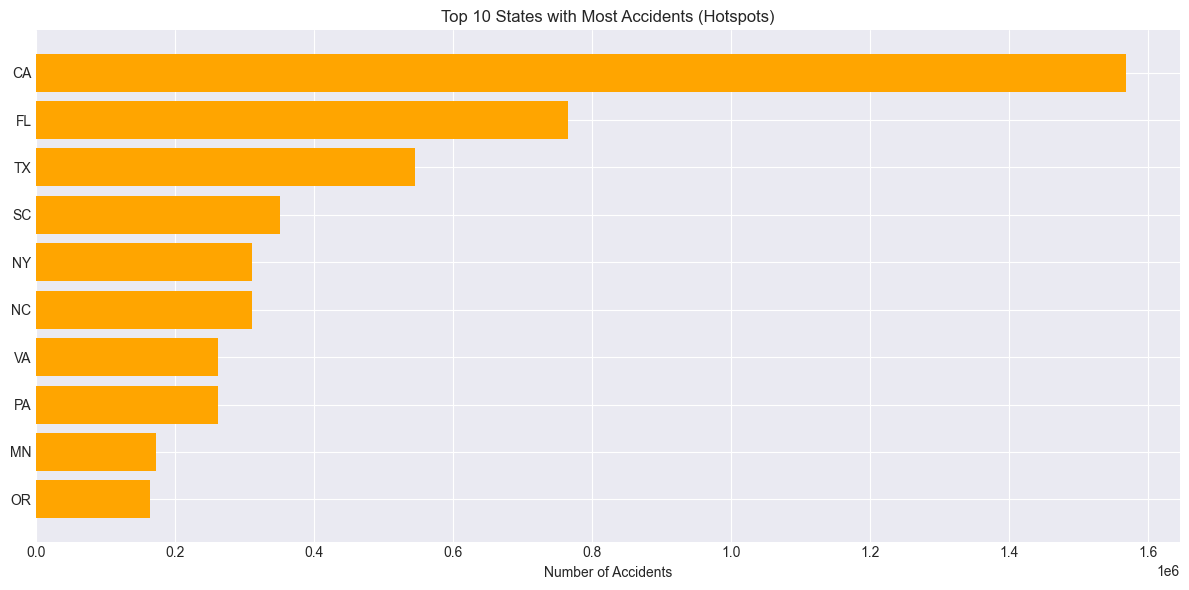


Top 5 accident hotspot states:
1. CA: 1,567,136 accidents
2. FL: 765,625 accidents
3. TX: 544,807 accidents
4. SC: 351,032 accidents
5. NY: 310,351 accidents


In [11]:
# ANALYSIS 5: Accident Hotspots (Geographic Distribution)
if 'State' in df.columns:
    # Top states with most accidents
    top_states = df['State'].value_counts().head(10)
    
    plt.figure(figsize=(12, 6))
    plt.barh(range(len(top_states)), top_states.values, color='orange')
    plt.yticks(range(len(top_states)), top_states.index)
    plt.xlabel('Number of Accidents')
    plt.title('Top 10 States with Most Accidents (Hotspots)')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    print("\nTop 5 accident hotspot states:")
    for i, (state, count) in enumerate(top_states.head().items(), 1):
        print(f"{i}. {state}: {count:,} accidents")

# Geographic scatter plot if coordinates are available
if 'Lat' in df.columns and 'Lng' in df.columns:
    # Sample for visualization (to avoid overcrowding)
    sample_size = min(10000, len(df))
    sample_df = df.sample(n=sample_size, random_state=42)
    
    plt.figure(figsize=(15, 8))
    plt.scatter(sample_df['Lng'], sample_df['Lat'], alpha=0.3, s=1, c='red')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'Accident Geographic Distribution (Sample of {sample_size:,} accidents)')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()